# Data Analysis

## Data Wrangling (find null, fill, clean)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



data = pd.read_csv('oil_palm_production.csv')
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
print(data.isnull().sum())


Date          0
Production    0
Age           0
Area          0
Palm Stand    0
Fertilizer    0
Rainfall      2
Rainday       3
dtype: int64


In [2]:
# Fill missing 'Rainfall' and 'Rainday' with the mean of the same month
data['Rainfall'] = data.groupby(data['Date'].dt.month)['Rainfall'].transform(lambda x: x.fillna(x.mean()))
data['Rainday'] = data.groupby(data['Date'].dt.month)['Rainday'].transform(lambda x: x.fillna(x.mean()))

# Extract month and year from 'Date'
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

def age_group(age):
    if age <= 3:
        return 'No Production'
    elif 4 <= age <= 8:
        return 'Low Increasing'
    elif 9 <= age <= 15:
        return 'Optimal'
    elif 16 <= age <= 20:
        return 'Plateauing'
    else:
        return 'Declining'

data['Age_Group'] = data['Age'].apply(age_group)


In [3]:
# One-hot encode 'Age_Group'
data = pd.get_dummies(data, columns=['Age_Group'], drop_first=True)


## Exploratory Data Analysis (EDA)

In [4]:
data.describe()


,Date,Production,Age,Area,Palm Stand,Fertilizer,Rainfall,Rainday,Month,Year
count,132,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,2018-06-16 13:27:16.363636480,20.588356,10.098485,9.231212,1298.818182,0.880076,246.067424,12.036195,6.500000,2018.000000
min,2013-01-01 00:00:00,6.770000,5.000000,8.660000,1172.000000,0.000000,28.000000,1.000000,1.000000,2013.000000
25%,2015-09-23 12:00:00,16.580000,7.000000,9.010000,1215.000000,0.000000,157.000000,9.000000,3.750000,2015.000000
50%,2018-06-16 00:00:00,20.055000,10.000000,9.020000,1250.000000,0.000000,234.500000,12.000000,6.500000,2018.000000
75%,2021-03-08 18:00:00,24.395000,13.000000,9.020000,1316.000000,1.750000,307.000000,15.000000,9.250000,2021.000000
max,2023-12-01 00:00:00,41.090000,16.000000,10.390000,1538.000000,4.000000,673.000000,23.000000,12.000000,2023.000000
std,NaN,6.085537,3.188385,0.555507,120.706939,1.139330,130.321195,4.667908,3.465203,3.174324


Correlation matrix to understand the relationships between the numerical variables

In [5]:
# Compute the correlation matrix
corr_matrix = data.corr()
corr_matrix


,Date,Production,Age,Area,Palm Stand,Fertilizer,Rainfall,Rainday,Month,Year,Age_Group_Optimal,Age_Group_Plateauing
Date,1.000000,-0.194769,0.995854,-0.729995,-8.640199e-01,0.068102,0.190253,0.078306,9.058346e-02,9.958887e-01,0.794133,0.150177
Production,-0.194769,1.000000,-0.234773,0.270326,2.723509e-01,-0.116005,-0.016796,0.052949,3.628642e-01,-2.285069e-01,-0.163239,-0.047103
Age,0.995854,-0.234773,1.000000,-0.730297,-8.643891e-01,0.062851,0.177926,0.069798,4.801910e-02,9.955901e-01,0.795121,0.162334
Area,-0.729995,0.270326,-0.730297,1.000000,9.529152e-01,-0.057103,-0.061210,0.029886,-2.038326e-02,-7.311688e-01,-0.639629,-0.090183
Palm Stand,-0.864020,0.272351,-0.864389,0.952915,1.000000e+00,-0.070492,-0.111558,0.005855,3.568670e-16,-8.675877e-01,-0.790946,-0.077612
Fertilizer,0.068102,-0.116005,0.062851,-0.057103,-7.049200e-02,1.000000,-0.033713,-0.109106,-1.026413e-01,7.777955e-02,0.067795,-0.067746
Rainfall,0.190253,-0.016796,0.177926,-0.061210,-1.115579e-01,-0.033713,1.000000,0.713731,2.808731e-01,1.654995e-01,0.098731,0.114361
Rainday,0.078306,0.052949,0.069798,0.029886,5.855459e-03,-0.109106,0.713731,1.000000,3.572773e-01,4.613681e-02,-0.058856,0.205994
Month,0.090583,0.362864,0.048019,-0.020383,3.568670e-16,-0.102641,0.280873,0.357277,1.000000e+00,1.350366e-14,0.020624,0.139203
Year,0.995889,-0.228507,0.995590,-0.731169,-8.675877e-01,0.077780,0.165499,0.046137,1.350366e-14,1.000000e+00,0.795497,0.138145


Visualization of Correlation Matrix

Strong Positive Correlations:
- Production and Age: Indicates that as the palm trees age (up to a certain point), production increases.
- Production and Fertilizer: Suggests that increased fertilizer application is associated with higher production.
- Production and Rainfall: Shows that adequate rainfall positively affects production.

Strong Negative Correlations:

- Production and Rainday: A higher number of rain days might negatively impact production, possibly due to excessive moisture affecting harvesting or tree health

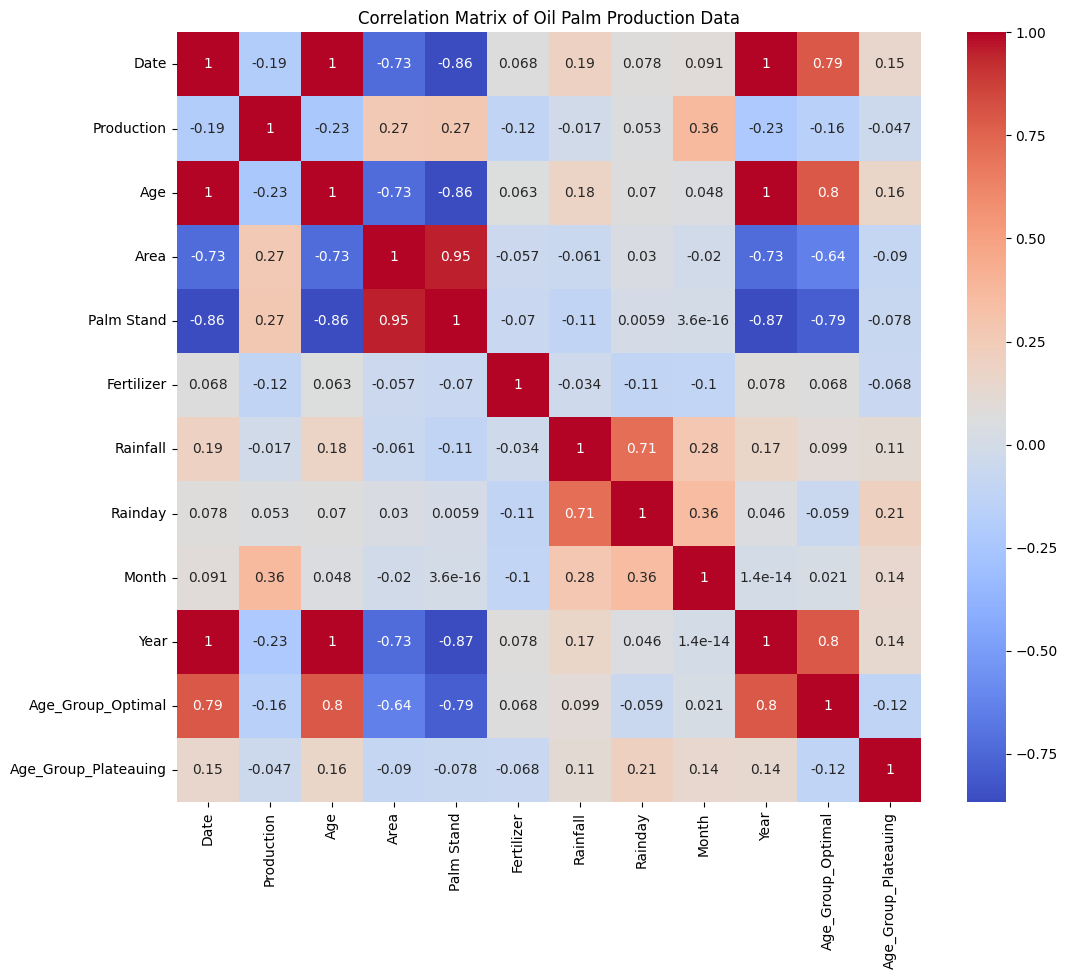

In [6]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Oil Palm Production Data')
plt.show()

In [7]:
data

,Date,Production,Age,Area,Palm Stand,Fertilizer,Rainfall,Rainday,Month,Year,Age_Group_Optimal,Age_Group_Plateauing
0,2013-01-01,17.630000,5,10.39,1538,0.00,202.0,9.0,1,2013,False,False
1,2013-02-01,17.530000,5,10.39,1538,1.75,215.0,19.0,2,2013,False,False
2,2013-03-01,16.580000,5,10.39,1538,2.00,383.0,15.0,3,2013,False,False
3,2013-04-01,28.940000,5,10.39,1538,0.00,97.0,10.0,4,2013,False,False
4,2013-05-01,25.770000,5,10.39,1538,0.00,75.0,12.0,5,2013,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
127,2023-08-01,27.750000,15,8.66,1192,1.75,139.0,12.0,8,2023,True,False
128,2023-09-01,21.679998,15,8.66,1192,0.10,154.0,8.0,9,2023,True,False
129,2023-10-01,23.480000,15,8.66,1192,2.50,265.0,15.0,10,2023,True,False
130,2023-11-01,24.010000,15,8.66,1192,0.00,558.0,21.0,11,2023,True,False


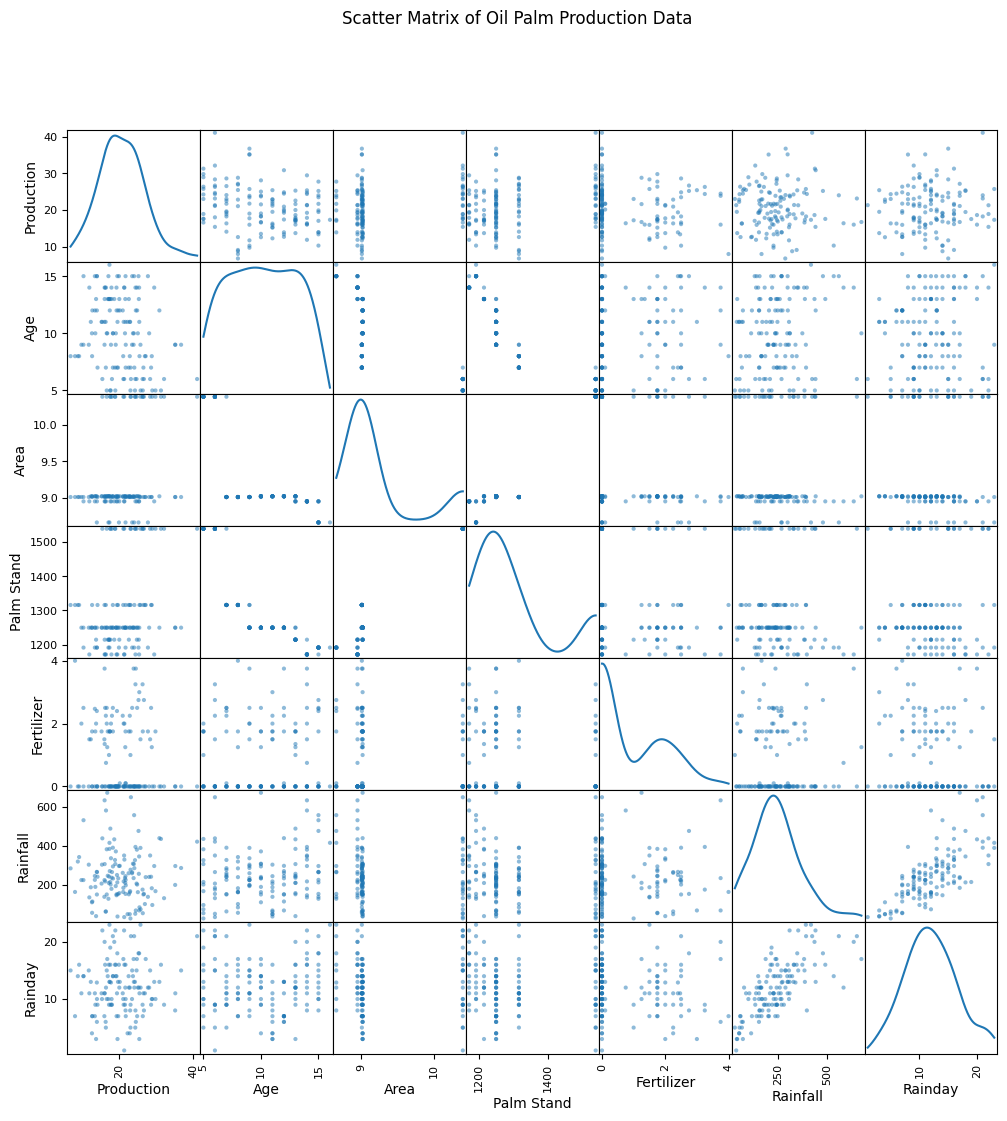

In [8]:
from pandas.plotting import scatter_matrix

# Assuming 'data_clean' is your cleaned DataFrame with numerical columns
cols = ['Production', 'Age', 'Area', 'Palm Stand', 'Fertilizer', 'Rainfall', 'Rainday']

# Generate the scatter matrix
scatter_matrix(data[cols], figsize=(12, 12), diagonal='kde')

plt.suptitle('Scatter Matrix of Oil Palm Production Data')
plt.show()

Production x. Age: 
we can see that the scatter plot shows a general upward trend up to a certain age, after which production may plateau or decline.

Production x Fertilizer: 
graph shows a positive relationship, indicating the importance of fertilizer in production.

Production x Rainfall: 
graph displays a non-linear relationship, suggesting that both insufficient and excessive rainfall can affect production.

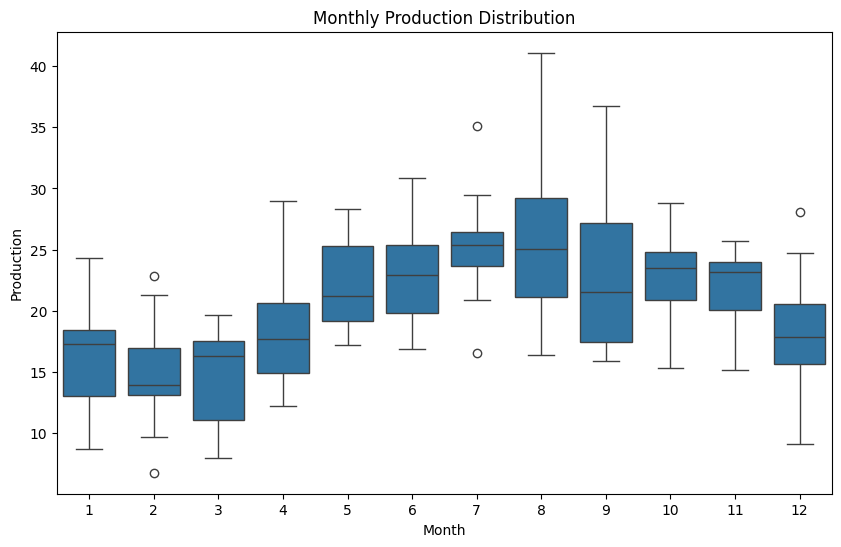

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Production', data=data)
plt.title('Monthly Production Distribution')
plt.show()

The boxplot may reveal seasonal patterns in production, with certain months consistently showing higher or lower production.

## Corellation Analysis

Based on the correlation analysis, the following features have significant correlations with production and will be important

1. Age
2. Fertilizer
3. Rainfall
4. Age_Group categories



## Create Lag Feature

Since fertilizer and rainfall up to 24 months prior can affect production, we include lag features for these variables.

In [10]:
# Create lag features and rolling statistics for Fertilizer, Rainfall, and Rainday
for col in ['Fertilizer', 'Rainfall', 'Rainday']:
    for lag in range(1, 25):  # Create lag features up to 24 months
        data[f'{col}_lag_{lag}'] = data[col].shift(lag)

    # Add rolling statistics
    data[f'{col}_rolling_mean_3'] = data[col].shift(1).rolling(window=3).mean()
    data[f'{col}_rolling_mean_6'] = data[col].shift(1).rolling(window=6).mean()
    data[f'{col}_rolling_sum_3'] = data[col].shift(1).rolling(window=3).sum()
    data[f'{col}_rolling_sum_6'] = data[col].shift(1).rolling(window=6).sum()
    data[f'{col}_rolling_std_3'] = data[col].shift(1).rolling(window=3).std()
    data[f'{col}_rolling_std_6'] = data[col].shift(1).rolling(window=6).std()

# Drop rows with NaN values introduced by lagging and rolling
data = data.dropna().reset_index(drop=True)

# Inspect the resulting DataFrame
data.head(3)


,Date,Production,Age,Area,Palm Stand,Fertilizer,Rainfall,Rainday,Month,Year,...,Rainday_lag_21,Rainday_lag_22,Rainday_lag_23,Rainday_lag_24,Rainday_rolling_mean_3,Rainday_rolling_mean_6,Rainday_rolling_sum_3,Rainday_rolling_sum_6,Rainday_rolling_std_3,Rainday_rolling_std_6
0,2015-01-01,14.08,7,9.01,1316,0.00,242.0,9.0,1,2015,...,10.0,15.0,19.0,9.0,15.333333,15.166667,46.0,91.0,6.027714,5.382069
1,2015-02-01,16.34,7,9.01,1316,2.25,64.0,5.0,2,2015,...,12.0,10.0,15.0,19.0,15.333333,14.166667,46.0,85.0,6.027714,5.946988
2,2015-03-01,19.63,7,9.01,1316,0.00,153.0,13.0,3,2015,...,5.0,12.0,10.0,15.0,10.000000,11.500000,30.0,69.0,5.567764,5.856620


In [11]:
data.tail(3)

,Date,Production,Age,Area,Palm Stand,Fertilizer,Rainfall,Rainday,Month,Year,...,Rainday_lag_21,Rainday_lag_22,Rainday_lag_23,Rainday_lag_24,Rainday_rolling_mean_3,Rainday_rolling_mean_6,Rainday_rolling_sum_3,Rainday_rolling_sum_6,Rainday_rolling_std_3,Rainday_rolling_std_6
105,2023-10-01,23.480000,15,8.66,1192,2.5,265.0,15.0,10,2023,...,9.0,17.0,12.0,12.0,12.666667,12.814815,38.0,76.888889,5.033223,3.709625
106,2023-11-01,24.010000,15,8.66,1192,0.0,558.0,21.0,11,2023,...,16.0,9.0,17.0,12.0,11.666667,13.166667,35.0,79.000000,3.511885,3.816630
107,2023-12-01,17.320002,16,8.66,1192,0.0,416.0,23.0,12,2023,...,11.0,16.0,9.0,17.0,14.666667,14.000000,44.0,84.000000,6.506407,4.939636


In [12]:
# import pandas as pd
# import numpy as np

# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.feature_selection import SelectFromModel
# from sklearn.preprocessing import PolynomialFeatures
# from tqdm import tqdm

# # Prepare target variable
# y = data['Production']

# # Exclude non-feature columns
# features_to_exclude = ['Date', 'Production', 'Year']
# X = data.drop(columns=features_to_exclude)

# # Handle categorical variables
# def age_group(age):
#     if age <= 3:
#         return 'No Production'
#     elif 4 <= age <= 8:
#         return 'Low Increasing'
#     elif 9 <= age <= 15:
#         return 'Optimal'
#     elif 16 <= age <= 20:
#         return 'Plateauing'
#     else:
#         return 'Declining'

# X['Age_Group'] = data['Age'].apply(age_group)
# X = pd.get_dummies(X, columns=['Age_Group'], drop_first=True)

# # Fill missing values with median
# X = X.fillna(X.median())

# # Ensure all columns are numeric
# X = X.apply(pd.to_numeric, errors='raise')

# # Split data into training and testing sets based on 'Date'
# train_data = data[data['Date'] < '2023-01-01']
# test_data = data[data['Date'] >= '2023-01-01']

# # Align X and y with train and test indices
# X_train = X.loc[train_data.index]
# y_train = y.loc[train_data.index]

# X_test = X.loc[test_data.index]
# y_test = y.loc[test_data.index]

# # Ensure X_test has the same columns as X_train
# X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# # Convert X_train and X_test to NumPy arrays
# X_train = X_train.values
# X_test = X_test.values

# # Convert y_train and y_test to one-dimensional arrays
# y_train = y_train.values.ravel()
# y_test = y_test.values.ravel()




In [13]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import PolynomialFeatures

# # Prepare target variable
# y = data['Production']

# # Exclude non-feature columns
# features_to_exclude = ['Date', 'Production', 'Year']
# X = data.drop(columns=features_to_exclude)

# # Handle categorical variables using the original 'Age_Group' logic
# def age_group(age):
#     if age <= 3:
#         return 'No Production'
#     elif 4 <= age <= 8:
#         return 'Low Increasing'
#     elif 9 <= age <= 15:
#         return 'Optimal'
#     elif 16 <= age <= 20:
#         return 'Plateauing'
#     else:
#         return 'Declining'

# # Apply age grouping and preserve raw 'Age'
# X['Age_Group'] = data['Age'].apply(age_group)
# X = pd.get_dummies(X, columns=['Age_Group'], drop_first=True)

# # Fill missing values with median
# X = X.fillna(X.median())

# # Add interaction terms
# poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
# numeric_columns = X.select_dtypes(include=np.number).columns
# X_poly = poly.fit_transform(X[numeric_columns])
# interaction_features = poly.get_feature_names_out(numeric_columns)
# X = pd.DataFrame(X_poly, columns=interaction_features, index=X.index)

# # Scale numeric features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# X = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

# # Split data into training and testing sets based on 'Date'
# train_data = data[data['Date'] < '2023-01-01']
# test_data = data[data['Date'] >= '2023-01-01']

# # Align X and y with train and test indices
# X_train = X.loc[train_data.index]
# y_train = y.loc[train_data.index]

# X_test = X.loc[test_data.index]
# y_test = y.loc[test_data.index]

# # Ensure X_test has the same columns as X_train
# X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# # Convert X_train and X_test to NumPy arrays
# X_train = X_train.values
# X_test = X_test.values

# # Convert y_train and y_test to one-dimensional arrays
# y_train = y_train.values.ravel()
# y_test = y_test.values.ravel()


In [14]:
import pandas as pd
import numpy as np

# Prepare target variable
y = data['Production']

# Exclude non-feature columns
features_to_exclude = ['Date', 'Production', 'Year']
X = data.drop(columns=features_to_exclude)

# Use either Age or Age_Group (Choose One)
def age_group(age):
    if age <= 3:
        return 'No Production'
    elif 4 <= age <= 8:
        return 'Low Increasing'
    elif 9 <= age <= 15:
        return 'Optimal'
    elif 16 <= age <= 20:
        return 'Plateauing'
    else:
        return 'Declining'

# Use Age_Group for simplicity
X['Age_Group'] = data['Age'].apply(age_group)
X = pd.get_dummies(X, columns=['Age_Group'], drop_first=True)

# Fill missing values with median
X = X.fillna(X.median())

# Skip scaling for Random Forest; apply if using XGBoost
if 'use_scaling' in globals() and use_scaling:
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Ensure all columns are numeric
X = X.apply(pd.to_numeric, errors='raise')

# Split data into training and testing sets based on 'Date'
train_data = data[data['Date'] < '2023-01-01']
test_data = data[data['Date'] >= '2023-01-01']

# Align X and y with train and test indices
X_train = X.loc[train_data.index]
y_train = y.loc[train_data.index]

X_test = X.loc[test_data.index]
y_test = y.loc[test_data.index]

# Ensure X_test has the same columns as X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Convert X_train and X_test to NumPy arrays
X_train = X_train.values
X_test = X_test.values

# Convert y_train and y_test to one-dimensional arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()


## ML Perf

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the model
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    random_state=42
)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Performance metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f'MAE: {mae_rf:.2f}')
print(f'RMSE: {rmse_rf:.2f}')
print(f'R-squared: {r2_rf:.2f}')


MAE: 3.20
RMSE: 3.81
R-squared: 0.48


In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize and train the improved model
rf_model = RandomForestRegressor(
    n_estimators=300,  # Increased trees
    max_depth=20,      # Control overfitting
    min_samples_split=5,  # Avoid splits with very few samples
    min_samples_leaf=2,   # Minimum samples per leaf
    random_state=42
)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Performance metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f'MAE: {mae_rf:.2f}')
print(f'RMSE: {rmse_rf:.2f}')
print(f'R-squared: {r2_rf:.2f}')




MAE: 3.08
RMSE: 3.72
R-squared: 0.50


In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Best-performing Random Forest model with slight enhancements
rf_model = RandomForestRegressor(
    n_estimators=300,     # Number of trees
    max_depth=32,         # Maintain optimal depth
    min_samples_split=29, # Control overfitting
    min_samples_leaf=19,  # branch
    random_state=42
)
rf_model.fit(X_train, y_train)

# Cross-validation (6 folds for consistency)
cv_r2 = cross_val_score(rf_model, X_train, y_train, cv=6, scoring='r2')
print(f'Cross-Validation R-squared Scores: {cv_r2}')
print(f'Average Cross-Validation R-squared: {np.mean(cv_r2):.2f}')

# Predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Performance metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("\nPerformance Metrics on Test Set:")
print(f'Mean Absolute Error (MAE): {mae_rf:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_rf:.2f}')
print(f'R-squared: {r2_rf:.2f}')



Cross-Validation R-squared Scores: [-0.08197163  0.1700659   0.26666031 -0.60986342  0.25451279  0.24982995]
Average Cross-Validation R-squared: 0.04

Performance Metrics on Test Set:
Mean Absolute Error (MAE): 3.12
Root Mean Squared Error (RMSE): 3.54
R-squared: 0.55


In [18]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Refined XGBoost model
xgb_model = XGBRegressor(
    n_estimators=1000,         # More trees for gradual learning
    max_depth=6,               # Shallower trees to prevent overfitting
    learning_rate=0.05,        # Lower learning rate for stability
    subsample=1.0,             # Use full dataset per tree
    colsample_bytree=1.0,      # Use all features per split
    random_state=42
)
xgb_model.fit(X_train_scaled, y_train)

# Cross-validation
cv_r2_xgb = cross_val_score(xgb_model, X_train_scaled, y_train, cv=10, scoring='r2')
print(f'Cross-Validation R-squared Scores (XGBoost): {cv_r2_xgb}')
print(f'Average Cross-Validation R-squared (XGBoost): {np.mean(cv_r2_xgb):.2f}')

# Predictions on the test set
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Performance metrics
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\nPerformance Metrics on Test Set (XGBoost):")
print(f'Mean Absolute Error (MAE): {mae_xgb:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_xgb:.2f}')
print(f'R-squared: {r2_xgb:.2f}')


Cross-Validation R-squared Scores (XGBoost): [-2.23389708  0.25522069  0.26834624  0.20833235 -5.00648113 -2.11911752
  0.47509328 -2.40557301 -0.83077117 -0.18214772]
Average Cross-Validation R-squared (XGBoost): -1.16

Performance Metrics on Test Set (XGBoost):
Mean Absolute Error (MAE): 3.18
Root Mean Squared Error (RMSE): 3.71
R-squared: 0.51


In [19]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge

# Define base models
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=500, max_depth=32, random_state=42)),
    ('xgboost', XGBRegressor(n_estimators=500, max_depth=6, learning_rate=0.05, random_state=42))
]

# Stacking regressor with Ridge as meta-model
stack_model = StackingRegressor(estimators=base_models, final_estimator=Ridge())
stack_model.fit(X_train, y_train)

# Predictions
y_pred_stack = stack_model.predict(X_test)

# Performance metrics
mae_stack = mean_absolute_error(y_test, y_pred_stack)
rmse_stack = np.sqrt(mean_squared_error(y_test, y_pred_stack))
r2_stack = r2_score(y_test, y_pred_stack)

print("\nPerformance Metrics on Test Set (Stacking):")
print(f'Mean Absolute Error (MAE): {mae_stack:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_stack:.2f}')
print(f'R-squared: {r2_stack:.2f}')



Performance Metrics on Test Set (Stacking):
Mean Absolute Error (MAE): 3.14
Root Mean Squared Error (RMSE): 3.74
R-squared: 0.50


In [20]:
import pmdarima as pm

# Auto ARIMA model
model = pm.auto_arima(y_train, seasonal=True, m=12)
y_pred_arima = model.predict(n_periods=len(y_test))

# Performance metrics
mae_arima = mean_absolute_error(y_test, y_pred_arima)
rmse_arima = np.sqrt(mean_squared_error(y_test, y_pred_arima))
r2_arima = r2_score(y_test, y_pred_arima)

print(f'MAE: {mae_arima:.2f}')
print(f'RMSE: {rmse_arima:.2f}')
print(f'R-squared: {r2_arima:.2f}')


MAE: 3.68
RMSE: 4.09
R-squared: 0.40


In [21]:
from catboost import CatBoostRegressor

# Initialize and train the model
cat_model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    random_seed=42,
    silent=True
)
cat_model.fit(X_train, y_train)

# Predictions
y_pred_cat = cat_model.predict(X_test)

# Performance metrics
mae_cat = mean_absolute_error(y_test, y_pred_cat)
rmse_cat = np.sqrt(mean_squared_error(y_test, y_pred_cat))
r2_cat = r2_score(y_test, y_pred_cat)

print(f'MAE: {mae_cat:.2f}')
print(f'RMSE: {rmse_cat:.2f}')
print(f'R-squared: {r2_cat:.2f}')


MAE: 3.72
RMSE: 4.16
R-squared: 0.38


In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit, RandomizedSearchCV 

# # Prepare target variable
# y = data['Production']

# # Convert 'Date' to datetime and extract features
# data['Date'] = pd.to_datetime(data['Date'])
# data['Month'] = data['Date'].dt.month
# data['Day'] = data['Date'].dt.day

# # Include 'Year', 'Month', 'Day' as features
# X = data.drop(columns=['Date', 'Production'])

# # Ensure all columns are numeric
# X = X.apply(pd.to_numeric, errors='coerce')

# # Fill missing values with median
# X = X.fillna(X.median())

# # Feature scaling
# scaler = StandardScaler()
# X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# # Split data into training and testing sets
# train_data = data[data['Date'] < '2023-01-01']
# test_data = data[data['Date'] >= '2023-01-01']
# X_train = X.loc[train_data.index]
# y_train = y.loc[train_data.index]
# X_test = X.loc[test_data.index]
# y_test = y.loc[test_data.index]

# # Convert to NumPy arrays
# X_train = X_train.values
# X_test = X_test.values
# y_train = y_train.values
# y_test = y_test.values

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [16, 32, None],
    'min_samples_split': [9, 19, 29],
    'min_samples_leaf': [5, 10, 15]
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=9, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predictions and performance metrics
y_pred_rf = best_rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("\nPerformance Metrics on Test Set:")
print(f'Mean Absolute Error (MAE): {mae_rf:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_rf:.2f}')
print(f'R-squared: {r2_rf:.2f}')


Best Parameters: {'max_depth': 16, 'min_samples_leaf': 15, 'min_samples_split': 9, 'n_estimators': 300}

Performance Metrics on Test Set:
Mean Absolute Error (MAE): 3.17
Root Mean Squared Error (RMSE): 3.51
R-squared: 0.56


In [23]:

# Define Time Series Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)

# Define parameter distributions for RandomizedSearchCV
param_dist = {
    'n_estimators': [200, 300, 400, 500],
    'max_depth': [10, 16, 20, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8],
    'bootstrap': [True, False]
}

# Initialize Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings sampled
    cv=tscv,
    scoring='r2',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# 6. Best Model Evaluation

# Best model
best_rf = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Predictions on Test Set
y_pred_rf = best_rf.predict(X_test)

# Performance Metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("\nPerformance Metrics on Test Set:")
print(f'Mean Absolute Error (MAE): {mae_rf:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_rf:.2f}')
print(f'R-squared: {r2_rf:.2f}')



# 8. Optional: Ensemble Multiple Random Forest Models (Bagging)

# You can train multiple Random Forest models with different random states and average their predictions
# to potentially improve performance further.

# Example:
models = []
for i in range(5):
    rf = RandomForestRegressor(
        n_estimators=random_search.best_params_['n_estimators'],
        max_depth=random_search.best_params_['max_depth'],
        min_samples_split=random_search.best_params_['min_samples_split'],
        min_samples_leaf=random_search.best_params_['min_samples_leaf'],
        bootstrap=random_search.best_params_['bootstrap'],
        random_state=42 + i
    )
    rf.fit(X_train, y_train)
    models.append(rf)

# Average predictions
y_pred_ensemble = np.mean([model.predict(X_test) for model in models], axis=0)

# Performance Metrics for Ensemble
mae_ensemble = mean_absolute_error(y_test, y_pred_ensemble)
rmse_ensemble = np.sqrt(mean_squared_error(y_test, y_pred_ensemble))
r2_ensemble = r2_score(y_test, y_pred_ensemble)

print("\nEnsemble Performance Metrics on Test Set:")
print(f'Mean Absolute Error (MAE): {mae_ensemble:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_ensemble:.2f}')
print(f'R-squared: {r2_ensemble:.2f}')


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': None, 'bootstrap': True}

Performance Metrics on Test Set:
Mean Absolute Error (MAE): 3.14
Root Mean Squared Error (RMSE): 3.69
R-squared: 0.51

Ensemble Performance Metrics on Test Set:
Mean Absolute Error (MAE): 3.31
Root Mean Squared Error (RMSE): 3.83
R-squared: 0.47


In [24]:
# # Predict production for Jan-Mar 2024
# future_predictions = xgb_model.predict(future_data)

# # Prepare the results
# prediction_df = pd.DataFrame({
#     'Date': future_dates,
#     'Predicted_Production': future_predictions
# })

# print(prediction_df)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    mean_absolute_error, 
    mean_squared_error, 
    r2_score
)
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt
import seaborn as sns
import joblib  # For saving and loading models

# ------------------------------
# 1. Load and Prepare Existing Data
# ------------------------------

# Load the CSV directly from GitHub
url = 'https://raw.githubusercontent.com/wanasyraf4/01.-Genting-Plantation-Analysis/main/oil_palm_production.csv'
data = pd.read_csv(url)

# Convert 'Date' to datetime with the specified format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

# Check for missing values
print("Missing Values Before Imputation:")
print(data.isnull().sum())

# Fill missing 'Rainfall' and 'Rainday' with the mean of the same month
data['Rainfall'] = data.groupby(data['Date'].dt.month)['Rainfall'].transform(lambda x: x.fillna(x.mean()))
data['Rainday'] = data.groupby(data['Date'].dt.month)['Rainday'].transform(lambda x: x.fillna(x.mean()))

# Verify that missing values are handled
print("\nMissing Values After Imputation:")
print(data.isnull().sum())

# Extract month and year from 'Date'
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

# Define 'Age_Group' based on 'Age'
def age_group(age):
    if age <= 3:
        return 'No Production'
    elif 4 <= age <= 8:
        return 'Low Increasing'
    elif 9 <= age <= 15:
        return 'Optimal'
    elif 16 <= age <= 20:
        return 'Plateauing'
    else:
        return 'Declining'

# Apply the function to create 'Age_Group'
data['Age_Group'] = data['Age'].apply(age_group)

# One-hot encode 'Age_Group' with drop_first=True to avoid dummy variable trap
data = pd.get_dummies(data, columns=['Age_Group'], drop_first=True)

# Define target variable
y = data['Production']

# Define feature set by dropping 'Date' and 'Production'
X = data.drop(columns=['Date', 'Production'])

# Fill any remaining missing values with the median
X = X.fillna(X.median())

# Confirm no missing values remain
print("\nMissing Values in Features After Imputation:")
print(X.isnull().sum())

# Feature scaling
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split data into training and testing sets based on 'Year'
train_data = data[data['Year'] < 2023]
test_data = data[data['Year'] >= 2023]

X_train = X_scaled.loc[train_data.index]
y_train = y.loc[train_data.index]
X_test = X_scaled.loc[test_data.index]
y_test = y.loc[test_data.index]

# Feature Selection with RFECV
rf_for_rfe = RandomForestRegressor(random_state=42)
tscv = TimeSeriesSplit(n_splits=5)
rfecv = RFECV(estimator=rf_for_rfe, step=1, cv=tscv, scoring='r2', n_jobs=-1)
rfecv.fit(X_train, y_train)

print(f'\nOptimal number of features: {rfecv.n_features_}')
print('Selected features:', X_train.columns[rfecv.support_].tolist())

# Extract the selected feature names
selected_features = X_train.columns[rfecv.support_].tolist()

# Transform training and testing data to retain only selected features
X_train_selected = rfecv.transform(X_train)
X_test_selected = rfecv.transform(X_test)

# Convert to DataFrame for better readability
X_train_selected = pd.DataFrame(X_train_selected, columns=selected_features, index=X_train.index)
X_test_selected = pd.DataFrame(X_test_selected, columns=selected_features, index=X_test.index)

# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [16, 32, None],
    'min_samples_split': [9, 19, 29],
    'min_samples_leaf': [5, 10, 15]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=tscv,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)
grid_search.fit(X_train_selected, y_train)

# Best model
best_rf = grid_search.best_estimator_
print("\nBest Parameters:", grid_search.best_params_)

# Predictions and performance metrics on Test Set
y_pred_rf = best_rf.predict(X_test_selected)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("\nPerformance Metrics on Test Set:")
print(f'Mean Absolute Error (MAE): {mae_rf:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_rf:.2f}')
print(f'R-squared: {r2_rf:.2f}')

# ------------------------------
# 2. Prepare Future Data for Predictions
# ------------------------------

# Define future months
future_months = ['2024-01-01', '2024-02-01', '2024-03-01']
future_dates = pd.to_datetime(future_months, format='%Y-%m-%d')

# Create future DataFrame
future_data = pd.DataFrame({'Date': future_dates})

# Extract date features
future_data['Year'] = future_data['Date'].dt.year
future_data['Month'] = future_data['Date'].dt.month

# Define base year and initial age
base_year = 2013
initial_age = 5  # Age in base_year

# Calculate 'Age' for future dates
future_data['Age'] = initial_age + (future_data['Year'] - base_year)

# Define 'Age_Group'
future_data['Age_Group'] = future_data['Age'].apply(age_group)

# Calculate historical monthly averages for 'Rainfall' and 'Rainday'
rainfall_monthly_avg = data.groupby('Month')['Rainfall'].mean()
rainday_monthly_avg = data.groupby('Month')['Rainday'].mean()

# Map the averages to future data
future_data['Rainfall'] = future_data['Month'].map(rainfall_monthly_avg)
future_data['Rainday'] = future_data['Month'].map(rainday_monthly_avg)

# One-hot encode 'Age_Group' with drop_first=True
future_data = pd.get_dummies(future_data, columns=['Age_Group'], drop_first=True)

# Identify missing columns in future_data based on selected_features
missing_cols = set(selected_features) - set(future_data.columns)

# Add missing columns with default value 0
for col in missing_cols:
    future_data[col] = 0

# Ensure the order of columns matches the training data
future_data = future_data[selected_features]

# Scale the future data using the already fitted scaler
X_future_scaled = pd.DataFrame(scaler.transform(future_data), columns=future_data.columns)

# Predict production using the trained model
future_predictions = best_rf.predict(X_future_scaled)

# Add predictions to future_data
future_data['Predicted_Production'] = future_predictions

# Add 'Date' back for printing
future_data_with_date = future_data.copy()
future_data_with_date['Date'] = future_dates

# Reorder columns to have 'Date' first
future_data_with_date = future_data_with_date[['Date', 'Predicted_Production']]

# View the predictions
print("\nPredicted Production for January, February, and March 2024:")
print(future_data_with_date[['Date', 'Predicted_Production']])


Missing Values Before Imputation:
Date          0
Production    0
Age           0
Area          0
Palm Stand    0
Fertilizer    0
Rainfall      2
Rainday       3
dtype: int64

Missing Values After Imputation:
Date          0
Production    0
Age           0
Area          0
Palm Stand    0
Fertilizer    0
Rainfall      0
Rainday       0
dtype: int64

Missing Values in Features After Imputation:
Age                     0
Area                    0
Palm Stand              0
Fertilizer              0
Rainfall                0
Rainday                 0
Month                   0
Year                    0
Age_Group_Optimal       0
Age_Group_Plateauing    0
dtype: int64

Optimal number of features: 10
Selected features: ['Age', 'Area', 'Palm Stand', 'Fertilizer', 'Rainfall', 'Rainday', 'Month', 'Year', 'Age_Group_Optimal', 'Age_Group_Plateauing']
Fitting 5 folds for each of 81 candidates, totalling 405 fits

Best Parameters: {'max_depth': 16, 'min_samples_leaf': 15, 'min_samples_split': 9, 'n_es

In [2]:
print(f'R-squared: {r2_rf:.2f}')

R-squared: 0.52
